In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

import warnings
warnings.simplefilter(action='ignore')
sns.set(rc={'figure.figsize': [7, 7]}, font_scale=1.2)
%matplotlib inline

In [68]:
df =pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [70]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [71]:
df.isna().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [72]:
df.dropna(inplace=True)

In [76]:
df.duplicated().sum()

0

In [77]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [78]:
df['year'] = df['pickup_datetime'].dt.year
df['month'] = df['pickup_datetime'].dt.month
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour

In [79]:
df.drop(columns=['Unnamed: 0', 'key', 'pickup_datetime'], inplace=True)

In [80]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


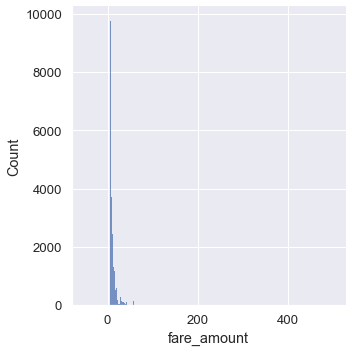

In [81]:
sns.displot(df['fare_amount'])

<AxesSubplot:xlabel='fare_amount'>

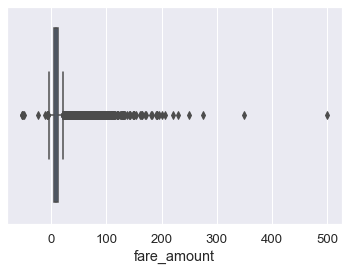

In [82]:
sns.boxplot(df['fare_amount'])

In [83]:
df[df['fare_amount']<=0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
20744,0.00,-73.658897,40.805199,-73.658897,40.805199,1,2015,4,22,23
22182,0.00,-73.994366,40.755395,-73.998718,40.854853,2,2010,3,20,2
63395,-5.00,-73.992249,40.748936,-73.988518,40.748180,1,2015,3,3,23
71246,-3.30,-73.952725,40.768235,-73.949928,40.772208,2,2010,2,11,21
79903,-3.50,-73.982430,40.775024,-73.981750,40.778439,1,2015,5,1,14
87467,0.00,-73.969475,40.807503,0.000000,0.000000,2,2015,1,4,3
89322,-49.57,-73.972772,40.785657,-73.972867,40.785500,5,2010,3,9,8
92063,-23.70,-73.952740,40.768233,-74.007028,40.707338,3,2010,3,12,8
98875,-52.00,-74.000359,40.728729,-74.005699,40.728680,5,2015,3,20,21
104080,-7.30,-73.952623,40.766942,-73.953787,40.784882,1,2010,3,9,20


In [84]:
len(df[df['fare_amount']<=0])

22

In [85]:
df = df[df['fare_amount']>0]

In [86]:
df.shape

(199977, 10)

<AxesSubplot:xlabel='fare_amount'>

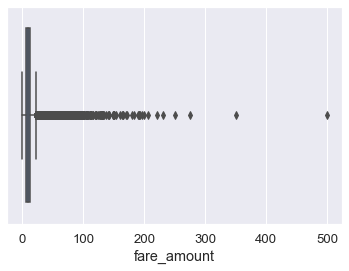

In [87]:
sns.boxplot(df['fare_amount'])

In [88]:
df[df['fare_amount']>=300]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
4292,350.0,0.000000,0.000000,0.000000,0.0000,3,2014,10,24,20
170081,499.0,-73.968377,40.764602,-73.968368,40.7646,1,2011,4,10,4


In [89]:
df = df[df['fare_amount']<300]

In [90]:
df['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [91]:
df[df['passenger_count']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
333,10.1,-74.013900,40.707800,-73.992300,40.749300,0,2011,8,5,7
908,11.7,-73.981000,40.764600,-73.962900,40.778400,0,2011,9,6,12
926,3.3,-73.979978,40.765821,-73.983894,40.766873,0,2012,3,26,18
2000,15.7,-73.975285,40.750138,-73.974729,40.783151,0,2012,4,20,15
3011,6.1,-73.977900,40.789100,-73.983700,40.773600,0,2012,1,7,19
...,...,...,...,...,...,...,...,...,...,...
196797,3.3,-74.000760,40.757637,-74.004852,40.751947,0,2011,1,17,15
197103,7.3,0.000000,0.000000,0.000000,0.000000,0,2011,12,10,15
198872,5.7,-73.980300,40.742800,-73.967900,40.755600,0,2011,9,20,19
198902,12.1,-73.996700,40.737200,-74.008500,40.704000,0,2011,8,22,21


In [92]:
df = df[df['passenger_count']!=0]

In [93]:
df[df['passenger_count']==208]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
113038,11.7,-73.937795,40.758498,-73.937835,40.758415,208,2010,12,28,8


In [94]:
df = df[df['passenger_count']!=208]

In [95]:
df.shape

(199266, 10)

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

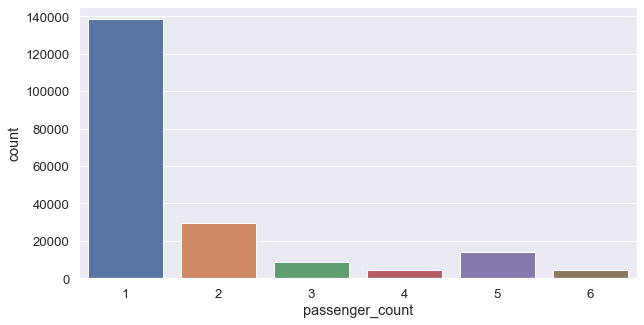

In [96]:
plt.figure(figsize=(10,5))
sns.countplot(df['passenger_count'])

In [97]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [118]:
df[df['dropoff_latitude']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
7,2.5,0.0,0.0,0.0,0.0,1,2012,12,11,13
11,8.5,0.0,0.0,0.0,0.0,1,2011,5,23,22
65,6.0,0.0,0.0,0.0,0.0,1,2014,5,5,19
92,6.1,0.0,0.0,0.0,0.0,1,2011,12,2,14
120,6.5,0.0,0.0,0.0,0.0,1,2010,8,20,19
...,...,...,...,...,...,...,...,...,...,...
199718,4.9,0.0,0.0,0.0,0.0,1,2011,8,19,7
199724,7.5,0.0,0.0,0.0,0.0,1,2013,10,11,11
199880,6.5,0.0,0.0,0.0,0.0,1,2014,2,22,6
199883,12.5,0.0,0.0,0.0,0.0,2,2012,9,10,17


In [119]:
df = df[df['dropoff_latitude']!=0]

In [121]:
df[df['dropoff_longitude']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
25158,8.9,-73.993072,40.752747,0.0,40.764628,1,2012,7,2,15
58246,8.0,-73.947277,40.805427,0.0,40.802898,1,2013,8,26,18
65616,9.0,-73.987972,40.727948,0.0,40.746405,1,2013,3,23,20
118338,14.5,-74.004672,40.746927,0.0,40.774267,2,2012,10,9,7
130954,6.9,-73.955208,40.773128,0.0,40.758190,5,2012,1,20,18
136831,22.0,-74.010627,40.711522,0.0,40.763468,2,2013,3,8,11
140620,6.1,-73.991332,40.739263,0.0,-0.563333,1,2010,8,11,5
175214,6.9,-73.989682,40.735220,0.0,40.745900,1,2011,10,27,0


In [122]:
df = df[df['dropoff_longitude']!=0]

In [123]:
df[df['pickup_latitude']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
346,15.50,0.0,0.0,-73.979805,40.786030,1,2015,3,5,19
2547,10.10,0.0,0.0,-73.953210,40.803528,2,2011,9,20,21
3045,15.00,0.0,0.0,-73.843777,40.739255,1,2013,3,26,2
3436,6.90,0.0,0.0,-73.975224,40.761041,1,2012,2,20,0
4342,5.00,0.0,0.0,-73.975662,40.752422,2,2015,2,2,22
...,...,...,...,...,...,...,...,...,...,...
191229,5.70,0.0,0.0,-73.991007,40.717315,2,2012,7,22,21
195099,4.00,0.0,0.0,-73.970975,40.793195,1,2013,1,15,12
196674,4.50,0.0,0.0,-73.987461,40.741804,1,2011,3,7,9
196967,57.33,0.0,0.0,-73.789045,40.655135,2,2014,9,17,9


In [124]:
df = df[df['pickup_latitude']!=0]

In [125]:
df[df['pickup_longitude']==0]

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
3445,11.5,0.0,40.767907,-73.996505,40.727322,1,2013,1,16,22
36559,15.7,0.0,40.723357,-73.965420,40.771815,2,2012,6,12,21
41383,4.9,0.0,40.734470,-73.995492,40.749242,1,2012,6,25,6
52670,5.7,0.0,40.763093,-73.977192,40.765322,1,2011,9,7,17
65778,10.5,0.0,40.768233,-73.969383,40.795540,1,2012,5,24,18
95838,45.0,0.0,40.639937,-73.989228,40.723108,2,2011,11,28,13
104167,12.9,0.0,40.751187,-73.999208,40.720160,1,2012,6,13,11


In [126]:
df = df[df['pickup_longitude']!=0]

In [127]:
df.shape

(195324, 10)

In [128]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


----------------------------------------------------------------------------------------------------
2012    31389
2011    30778
2013    30635
2009    30173
2010    29545
2014    29284
2015    13520
Name: year, dtype: int64


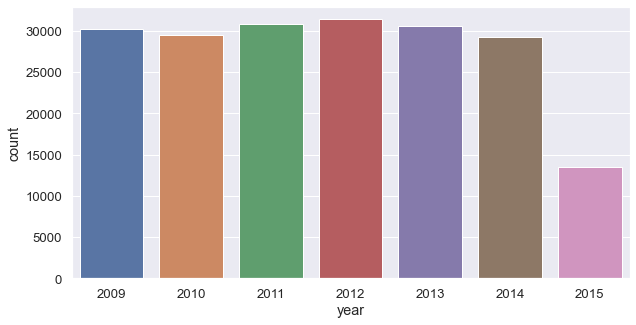

----------------------------------------------------------------------------------------------------
5     18430
3     18300
4     18128
6     17391
1     17269
2     16283
10    15862
12    15156
11    14983
9     14927
7     14760
8     13835
Name: month, dtype: int64


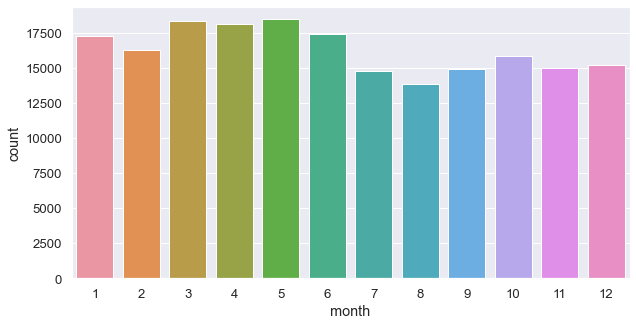

----------------------------------------------------------------------------------------------------
18    6737
17    6719
8     6696
16    6685
14    6677
9     6630
19    6621
12    6620
23    6602
11    6582
20    6565
10    6543
13    6534
22    6525
7     6484
21    6432
6     6420
15    6377
5     6353
24    6336
28    6271
4     6191
3     6135
26    6118
27    6097
1     6066
25    6066
2     6066
29    5830
30    5695
31    3651
Name: day, dtype: int64


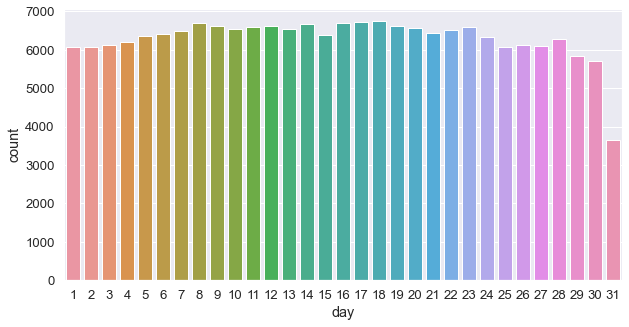

----------------------------------------------------------------------------------------------------
19    12318
18    11793
20    11475
21    11183
22    10773
13     9773
12     9701
23     9578
14     9556
17     9497
15     9380
11     9200
9      9126
8      8873
10     8757
16     8104
0      7662
7      7059
1      5764
2      4314
6      4036
3      3179
4      2305
5      1918
Name: hour, dtype: int64


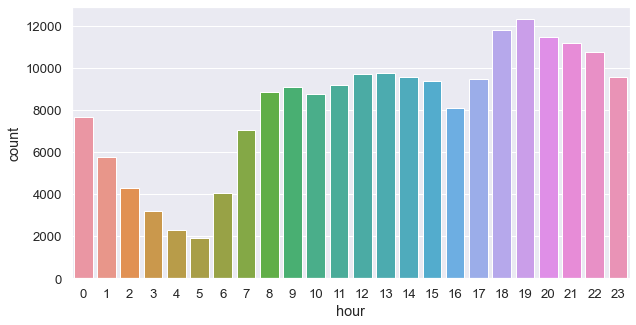

In [129]:
for col in df[['year', 'month', 'day', 'hour']]:
    print('-'*100)
    print(df[col].value_counts())
    plt.figure(figsize=(10,5))
    sns.countplot(df[col])
    plt.show()

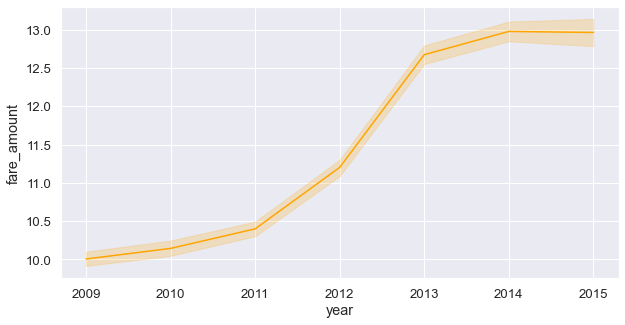

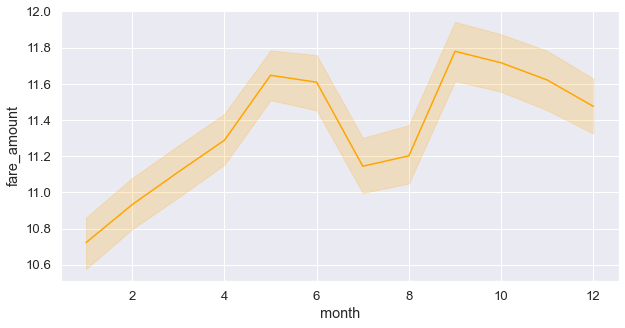

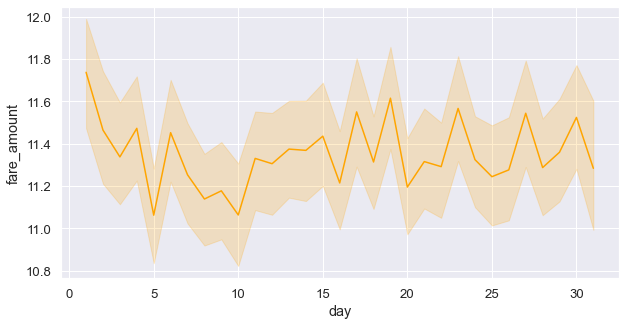

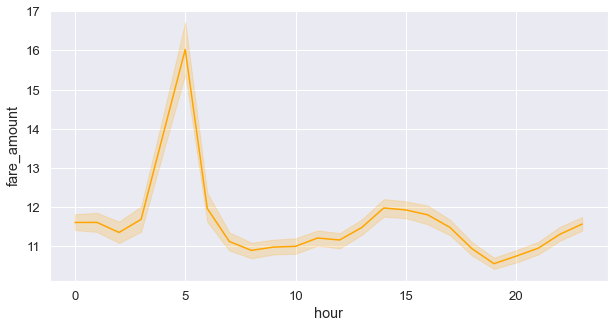

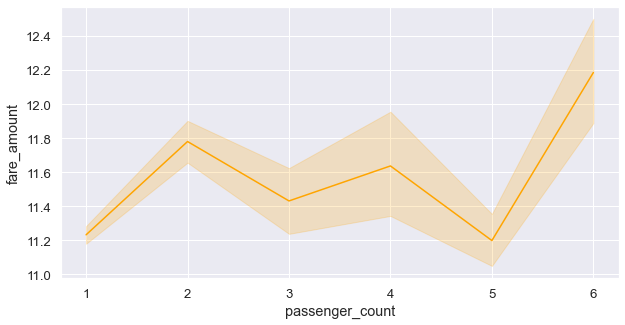

In [130]:
for col in df[['year', 'month', 'day', 'hour', 'passenger_count']]:
    plt.figure(figsize=(10,5))
    sns.lineplot(x=df[col], y=df['fare_amount'], color='orange')
    plt.show()

In [132]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,7,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,17,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,24,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,26,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,28,17


In [133]:
x = df.drop('fare_amount', axis=1) 
y = df['fare_amount']

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [135]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [143]:
models = {
    "LR": LinearRegression(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [144]:
for name, model in models.items():
    print('-'*30)
    print(f'Using model: {name}')
    
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    
    y_pred = model.predict(x_test)
    print(f'Test Score: {r2_score(y_test, y_pred)}')  

------------------------------
Using model: LR
Training Score: 0.016208479510950835
Test Score: 0.016624911384211627
------------------------------
Using model: DT
Training Score: 1.0
Test Score: 0.6679928812464118
------------------------------
Using model: RF
Training Score: 0.9765538161166835
Test Score: 0.8262271422886374
------------------------------
Using model: XGBR
Training Score: 0.89662141546166
Test Score: 0.8275982465075531


In [180]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

model = XGBRegressor(n_estimators=55, max_depth=10)
model.fit(x_train, y_train)
print(f'Training Score: {model.score(x_train, y_train)}')

y_pred = model.predict(x_test)
print(f'Test Score: {r2_score(y_test, y_pred)}')  

Training Score: 0.9451972226622706
Test Score: 0.8383302885743089
